## Assignment 2
Trevor Kapuvari
Voter Turnout 2018

## Assignment 2
Trevor Kapuvari
Voter Turnout 2018

# Importing Libraries 

In [1]:
import altair as alt
import geopandas as gpd
import hvplot.pandas
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [2]:
#Loading the CSV and reading it
voterturnout2018df = pd.read_csv("./Data/voter_turnout_primary_election_2018.csv")
voterturnout2017df = pd.read_csv("./Data/voter_turnout_primary_election_2017.csv")
voterturnout2016df = pd.read_csv("./Data/voter_turnout_primary_election_2016.csv")
voterturnout2015df = pd.read_csv("./Data/voter_turnout_primary_election_2015.csv")

## Data Wrangling and Database Framing

voterturnout2018df

In [3]:
MainParties18 = voterturnout2018df[voterturnout2018df['political_party'].isin(['DEMOCRATIC','REPUBLICAN'])]
MainParties17 = voterturnout2017df[voterturnout2017df['political_party'].isin(['DEMOCRATIC','REPUBLICAN'])]
MainParties16 = voterturnout2016df[voterturnout2016df['political_party'].isin(['DEMOCRATIC','REPUBLICAN'])]
MainParties15 = voterturnout2015df[voterturnout2015df['political_party'].isin(['DEMOCRATIC','REPUBLICAN'])]

merged_elections = pd.concat([MainParties18, MainParties17, MainParties16, MainParties15], axis=0)
merged_elections

,election,election_date,precinct_description,precinct_code,political_party,voter_count
0,2018 GENERAL PRIMARY,5/15/2018,PHILA WD 01 DIV 01,101,DEMOCRATIC,158
3,2018 GENERAL PRIMARY,5/15/2018,PHILA WD 01 DIV 01,101,REPUBLICAN,9
4,2018 GENERAL PRIMARY,5/15/2018,PHILA WD 01 DIV 02,102,DEMOCRATIC,174
8,2018 GENERAL PRIMARY,5/15/2018,PHILA WD 01 DIV 02,102,REPUBLICAN,8
9,2018 GENERAL PRIMARY,5/15/2018,PHILA WD 01 DIV 03,103,DEMOCRATIC,243
...,...,...,...,...,...,...
6473,2015 MUNICIPAL PRIMARY,05/19/2015 12:00:00 AM,PHILA WD 66 DIV 44,6644,REPUBLICAN,61
6477,2015 MUNICIPAL PRIMARY,05/19/2015 12:00:00 AM,PHILA WD 66 DIV 45,6645,REPUBLICAN,48
6478,2015 MUNICIPAL PRIMARY,05/19/2015 12:00:00 AM,PHILA WD 66 DIV 45,6645,DEMOCRATIC,67
6482,2015 MUNICIPAL PRIMARY,05/19/2015 12:00:00 AM,PHILA WD 66 DIV 46,6646,REPUBLICAN,94


In [4]:
merged_elections.set_index(['precinct_code', 'election', 'political_party'], append=True)
#setting an index better organized the table to indicate ways to tidy/pivot it to our liking

,,,,election_date,precinct_description,voter_count
,precinct_code,election,political_party,,,
0,101,2018 GENERAL PRIMARY,DEMOCRATIC,5/15/2018,PHILA WD 01 DIV 01,158
3,101,2018 GENERAL PRIMARY,REPUBLICAN,5/15/2018,PHILA WD 01 DIV 01,9
4,102,2018 GENERAL PRIMARY,DEMOCRATIC,5/15/2018,PHILA WD 01 DIV 02,174
8,102,2018 GENERAL PRIMARY,REPUBLICAN,5/15/2018,PHILA WD 01 DIV 02,8
9,103,2018 GENERAL PRIMARY,DEMOCRATIC,5/15/2018,PHILA WD 01 DIV 03,243
...,...,...,...,...,...,...
6473,6644,2015 MUNICIPAL PRIMARY,REPUBLICAN,05/19/2015 12:00:00 AM,PHILA WD 66 DIV 44,61
6477,6645,2015 MUNICIPAL PRIMARY,REPUBLICAN,05/19/2015 12:00:00 AM,PHILA WD 66 DIV 45,48
6478,6645,2015 MUNICIPAL PRIMARY,DEMOCRATIC,05/19/2015 12:00:00 AM,PHILA WD 66 DIV 45,67


In [5]:
tidyElections = pd.pivot(merged_elections, columns = ("election", "political_party"), index = "precinct_code", values = "voter_count")
tidyElections

election        2018 GENERAL PRIMARY            2017 MUNICIPAL PRIMARY  \
political_party           DEMOCRATIC REPUBLICAN             DEMOCRATIC   
precinct_code                                                            
101                            158.0        9.0                  135.0   
102                            174.0        8.0                  178.0   
103                            243.0       16.0                  205.0   
104                            183.0       28.0                  147.0   
105                             84.0        7.0                   62.0   
...                              ...        ...                    ...   
6642                            49.0       40.0                   47.0   
6643                            84.0       63.0                   79.0   
6644                            98.0       44.0                   71.0   
6645                            31.0       26.0                   29.0   
6646                            58.0       69.0                   73.0   

election                   2016 GENERAL PRIMARY             \
political_party REPUBLICAN           REPUBLICAN DEMOCRATIC   
precinct_code                                                
101                    4.0                 13.0      207.0   
102                    6.0                 38.0      288.0   
103                   10.0                 37.0      318.0   
104                   21.0                 65.0      242.0   
105                    8.0                 11.0      124.0   
...                    ...                  ...        ...   
6642                  32.0                 95.0      122.0   
6643                  44.0                176.0      168.0   
6644                  33.0                122.0      175.0   
6645                  19.0                100.0       80.0   
6646                  78.0                164.0      119.0   

election        2015 MUNICIPAL PRIMARY             
political_party             DEMOCRATIC REPUBLICAN  
precinct_code                                      
101                              157.0        3.0  
102                              187.0       11.0  
103                              245.0       17.0  
104                              170.0       24.0  
105                               98.0       10.0  
...                                ...        ...  
6642                             101.0       63.0  
6643                             147.0      100.0  
6644                             159.0       61.0  
6645                              67.0       48.0  
6646                             113.0       94.0  

[1688 rows x 8 columns]

### Matplotlib Chart, Data & Plotting

Here we are comparing voter participation for the Democratic Party between the years of 2016 and 2018, specifically among their primary elections. 

Matplotlib was used for the scatter chart because of the simplisity and direct approach to plotting large sets of data. The basic approach of matplotlib creates visualizations that are easy to comprehend for viewers. 

Here, we can tell that the precincts that had more votes in 2016 also had more votes in 2018, with some notable outliers. 

In [6]:
x= tidyElections['2018 GENERAL PRIMARY']['DEMOCRATIC']
y = tidyElections['2016 GENERAL PRIMARY']['DEMOCRATIC']

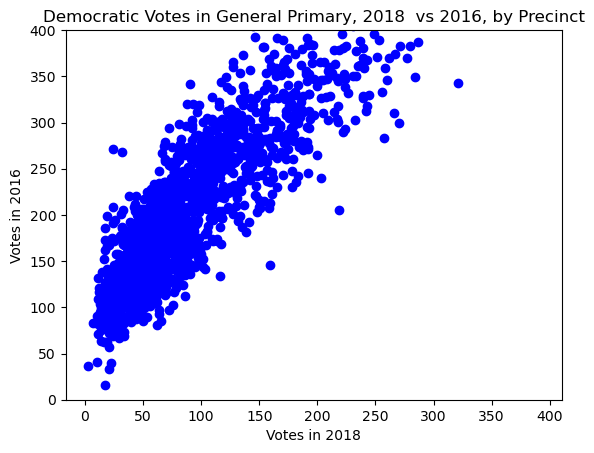

In [7]:
#matplotlib

fig, ax = plt.subplots()
x = x #2018 votes
y = y #2016 votes 
ax.scatter(x, y, c='blue')
ax.set_title('Democratic Votes in General Primary, 2018  vs 2016, by Precinct')
ax.set_xlabel('Votes in 2018')
ax.set_ylabel('Votes in 2016')
plt.ylim(0,400)
plt.show()

The scatter plot displays the difference in Democratic votes in the 2018 and 2016 general primaries. Each dot represents a precinct that compares the two years. 
You may also notice the cluster goes off the chart when trending upward. This cut-off was done on purpose, the x and y axis are fixed to be the same to demonstrate the difference in voter participation. 
In 2016, a presidential election year, showed significantly more participation than in 2018, a mid-term election year. When lookinng at individual points, you will notice there is, generally, more votes counted in 2016 than in 2018. 

# Seaborn Charts
In order to better visualize the seaborn chart, we needed to extract specific data that pandas can better comprehend. The issue with tidyElections is the nested columns among elections and political party votes. 

In [8]:
Electiondf = pd.DataFrame({'Election':['2018 GENERAL PRIMARY','2017 MUNICIPAL PRIMARY','2016 GENERAL PRIMARY','2015 MUNICIPAL PRIMARY'],
                            'Democratic Votes':[154206,161534,350914,241611],
                            'Republican Votes':[16378, 12237, 47684, 20411],
                            'Total':[170584,173771,398598,262022]})

In [9]:
Electiondf.reset_index()

,index,Election,Democratic Votes,Republican Votes,Total
0,0,2018 GENERAL PRIMARY,154206,16378,170584
1,1,2017 MUNICIPAL PRIMARY,161534,12237,173771
2,2,2016 GENERAL PRIMARY,350914,47684,398598
3,3,2015 MUNICIPAL PRIMARY,241611,20411,262022


### Republican Votes in Primary Elections compared to Total Votes

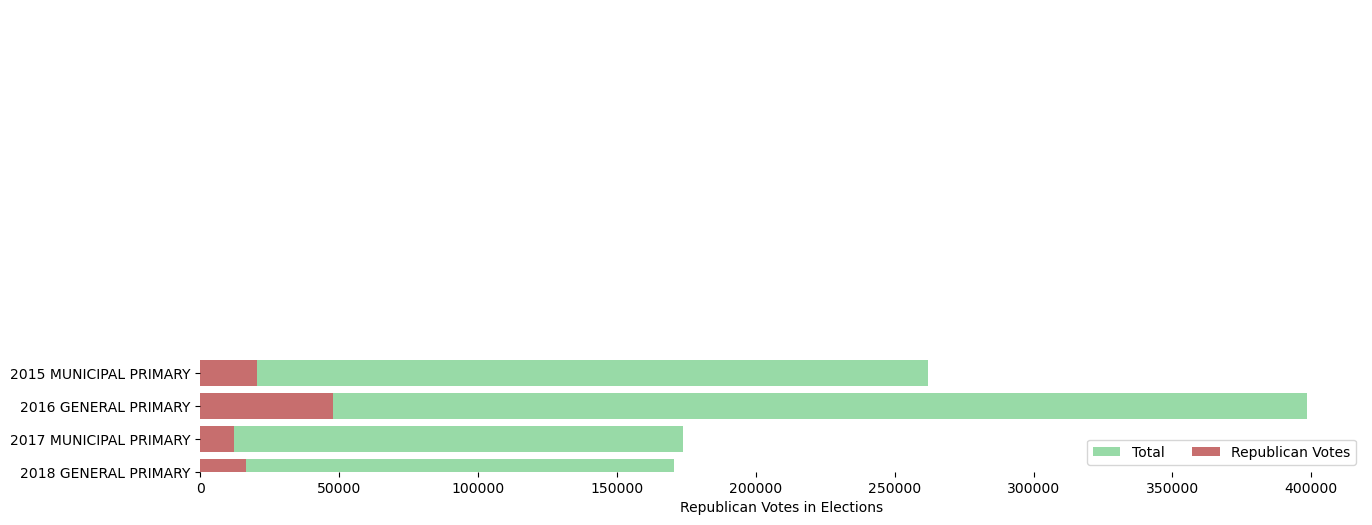

In [10]:
f, ax = plt.subplots(figsize=(15,6))

sns.set_color_codes("pastel")
sns.barplot(y="Election", x="Total", data=Electiondf,
            label="Total", color="g")

sns.set_color_codes("muted")
sns.barplot(y="Election", x="Republican Votes", data=Electiondf,
            label="Republican Votes", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(0, 14), ylabel="",
       xlabel="Republican Votes in Elections")
sns.despine(left=True, bottom=True)

Regardless of political opinions, it is evident that Republican participation in the Phildelphia area is significantly overshadowed by the Democratic party and has generally a weaker base in the city. The point of the chart is to visualize that minority vote in each election. The chart measures the amount of people who voted in primary elections, general and municipal, while also showing what portion is Republican. While this does not guarantee any election forecast, what these results can reasonably conclude is that there is a low amount of registered Republicans that vote in primaries compared to other parties. 

## Altair Chart 1
### Pie Chart of Election Participation Overall

In [11]:
alt.Chart(Electiondf, title="Voting Comparisons by Election").mark_arc(innerRadius=50).encode(
    theta="Total",
    color="Election:N",
)

alt.Chart(...)

The pie chart helps us conclude the amount of voter participation in each election year. 

We notice two major changes over time from the chart. The first is that voter turnout decreased from 2015 to 2018 generally, and peaked at 2016. 

The second is that the largest declines in turnout were from municipal elections, specifically the years 2015 and 2017.

## Altair 2
### Voter Participation in Elections, Visualized Through Bar Chart

In [12]:
#altair 2
alt.Chart(Electiondf, title="Voting Comparisons by Election (Bar Form)").mark_bar().encode(
    x="Election",
    y="Total",
).properties(
    width=alt.Step(40),
)

alt.Chart(...)

The bar graph shows the same thing as the pie chart but better compares individual years to one another. We notice here that voter turnout has been declining overall in both types of elections ever since 2016.

## Altair 3
### Scatter Plot, Democrats vs Republicans in 9 Sampled Precincts
Here we look at 9 sampled precincts, specifically where Republicans accumulated their largest number of total votes. 

In [13]:
Election2018 = pd.read_csv("./Data/voters2018top9.csv")
Election2018

,Precinct,Sum of REPUBLICAN,Sum of DEMOCRATIC
0,3505,69,118
1,4503,81,118
2,4520,71,99
3,4524,69,89
4,5824,77,148
5,5841,90,142
6,6311,86,180
7,6520,87,255
8,6617,81,24
9,6646,69,58


In [14]:
#altair  3
brush = alt.selection_interval()
alt.Chart(Election2018).mark_point().encode(
    x='Sum of DEMOCRATIC',
    y='Sum of REPUBLICAN',
    color=alt.condition(brush, 'Precinct', alt.value('grey')),
).add_params(brush)

alt.Chart(...)

This chart shows precincts where Republicans accumulated the most votes in their primaries. We notice in one precinct, 6617, that there was larger participation by Republicans than by Democrats. This comparison can help us predict future election results in this parrticular precinct. Meanwhile, other precincts still have a heavy Democratic lean in terms of votes. 

# Altair Extra Credit

### Population Pyramid of Planet X
This dataset provides us the population of an unknown planet we will call Planet X, here we are going to examine how its population has grown over the past 100 years. Over the time-span, you can examine the baby boomer generation gradually escalating up the population pyramid, and there is a noticably lower birth rate that follows the generation. This top-heavy pyramid indicates an aging population with a lower birth rate and potentially demographic challenges in the future. 

(The dataset originially is U.S populations from 1850, for the proof of concept, I will be changing as many variables as possible while also explaining the function of each line.)

Link to Original: https://altair-viz.github.io/gallery/us_population_pyramid_over_time.html 

In [15]:
import altair as alt
from vega_datasets import data

source = data.population.url
source

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/population.json'

In [16]:
slider = alt.binding_range(min=1900, max=2000, step=10) 
#creates the transformable portion of the chart, the highest and lowest values, and the intervals ("steps"), in each.

years = alt.selection_point(fields=['year'], name='Select',  bind=slider, value={'year': 1950}) 
#The 'years' variable becomes the decider on which chart to present, the parameters here are your field (what column to show), name (optional but adds more aesthetic to the slider, removing this
#adds the paramter number. To make it the most intuitive for the user, I changed it to "select". `bind=slider` is the most important because that creates the slider, and the value sets the starting year.
# For the example, I set it to 1970 as a middle number. 

base = alt.Chart(source).add_params(
    years
).transform_filter(
    years
).transform_calculate(
    species=alt.expr.if_(alt.datum.sex == 1, 'Minions', 'Smurfs')
).properties(
    width=250
)
#the base variable sets the physical bars of the two populations. Having the base alone will only show the bars of sex 1, in this case 'Minions'. We then have to define the species because the data only sees them as sex 1 and sex 2. 
#species uses an altair expression "if". Because we aren't using pandas or any other package, the code for each package tends to have syntax that varies slightly from one another.
#if this expression was in pandas for example, we'd use `pd.loc[species['sex'] == 1] = 'Minions'
#                                                        `pd.loc[species['sex'] != 1] = 'Smurfs'

color_scale = alt.Scale(domain=['Minions', 'Smurfs'],
                        range=['#ede72d', '#8acaf2'])
#sets a color scale for the values, domain is all the "values" to be marked on the graph, and range are the selected colors. If this were numeric, the domain would be a single variable and the range would be `alt.Gradient` from the altair library.

left = base.transform_filter(
    alt.datum.species == 'Smurfs'
).encode(
    alt.Y('age:O').axis(None) #Specfies ordinal data, this can work with Q because the ages are numbers but the bars get thin and the graph is not as legible. We need O because that letter tells the computer this is ordinal data.
                                #age acts as a category rather than a measurement in this scenario. 
        .sort('descending'), #least to greatest in terms of population
    alt.X('people:Q') #Q as in quantitive, needed to specify the amount of people per "category" of age. 
        .title('Total Smurfs')
        .axis(values=[0,4000000,8000000,12000000])
        .sort('descending'), #align the population label with the rest of the graph
    alt.Color('species:N').scale(color_scale).legend(None) 
).mark_bar().properties(title='Smurfs')
#This creates a graph of its own, showing the population and age of smurfs. 

age_axis = base.encode(
    alt.Y('age:O').axis(None)
    .sort('descending'), #least to greatest in terms of population
    alt.Text('age:Q'),
).mark_text().properties(title='Age', width=25)
#This graph acts as its own, not displaying anything but the age as categories. Playing around with age as Ordinal or Quanititative can be non-binding because they're numbers, but requires consistency between the left and right graph. 

right = base.transform_filter(
    alt.datum.species == 'Minions'
).encode(
    alt.Y('age:O').axis(None)
    .sort('descending'),
    alt.X('people:Q')
    .axis(values=[0,4000000,8000000,12000000])
    .title('Total Minions')
    .sort('ascending'),
    alt.Color('species:N').scale(color_scale).legend(None)
).mark_bar().properties(title='Minions')

PopPyr = alt.concat(age_axis, left, right, age_axis, spacing=0, title =("Population Pyramid of Planet X"))
PopPyr

alt.ConcatChart(...)